# Radii and masses observed by Kepler

Figure 11.10 from Chapter 11 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Radii and masses of stars observed by Kepler. These include
 * shell burning stars with degenerate cores (red giants and AGB stars)
 * core helium burning (red clump) stars
 
We draw lines indicating the separation between red giant branch (RGB) and asymptotic giant
branch (AGB) stars.

Data are from Pinsonneault, M., et al. 2022, in prep.

In [13]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [14]:
plotFile = 'Fig11_10.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Kepler Radius and Mass data

CSV format files with data from Kepler asteroseismology from Pinsonneault, M., et al. 2022, in prep.

In [15]:
from astropy.time import Time

rgFile = 'RM_Kepler_RG.csv'
data = pd.read_csv(rgFile,comment='#')
rgM = np.array(data['Mass'])
rgR = np.array(data['Radius'])

rcFile = 'RM_Kepler_RC.csv'
data = pd.read_csv(rcFile,comment='#')
rcM = np.array(data['Mass'])
rcR = np.array(data['Radius'])

# axis limits

minM = 0.0 # Msun
maxM = 3.0 # Msun

minR = 4.0  # Rsun
maxR = 30.0 # Rsun

# RGB-AGB dividing lines

rgagbM = [0.0,0.55,1.0,1.0]
rgagbR = [8.0,8.0,12.2,30.0]

## Figure 11.10

Plot Radius against Mass, coding the points as.
 * Open circles: Red Giants (RGB and AGB) 
 * Closed circles: helium core burning (Red Clump)

Draw approximate dividing lines between RGB and AGB, and label RGB, AGB, and Red Clump stars.

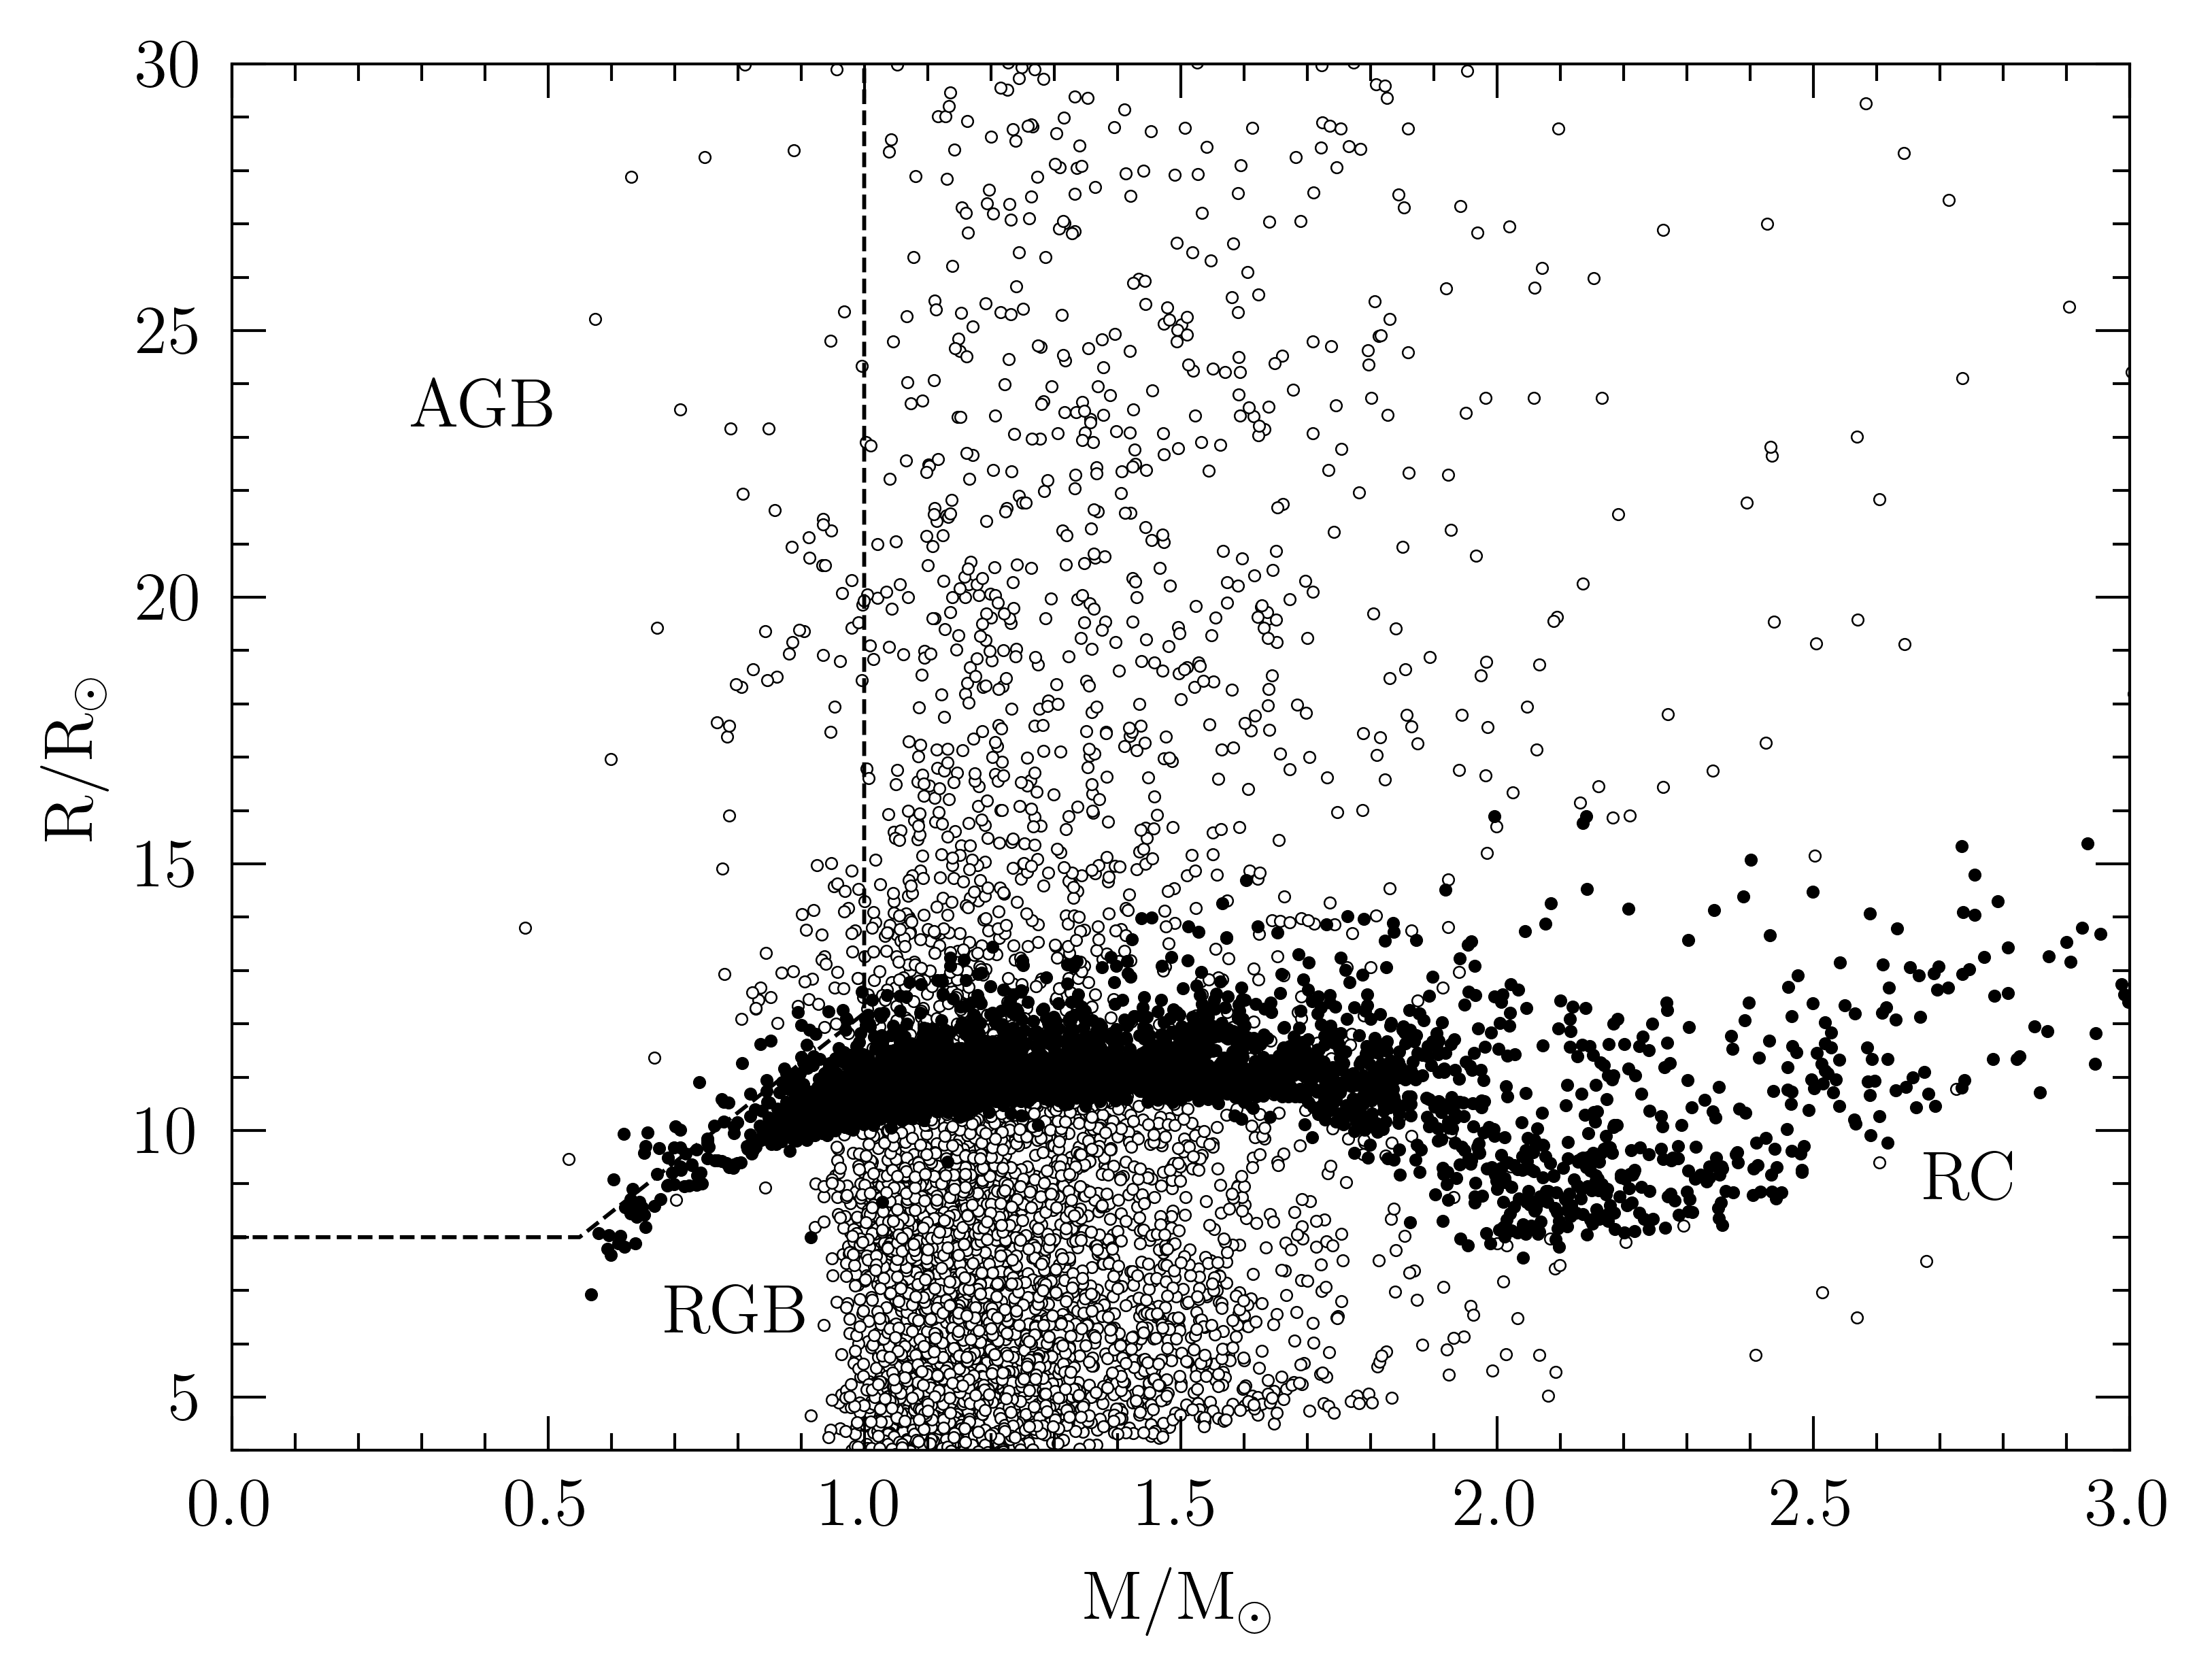

In [16]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(minM,maxM)
ax.set_xlabel(r'M/M$_\odot$',fontsize=axisFontSize)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylim(minR,maxR)
ax.yaxis.set_major_locator(MultipleLocator(5.0))
ax.yaxis.set_minor_locator(MultipleLocator(1.0))
ax.set_ylabel(r'R/R$_\odot$',fontsize=axisFontSize)

plt.plot(rgM,rgR,'o',ms=2,mfc='white',mec='black',mew=0.3,zorder=1)
plt.plot(rcM,rcR,'o',ms=2,mfc='black',mec='black',mew=0.3,zorder=2)

# RGB/AGB dividing lines

plt.plot(rgagbM,rgagbR,'--',lw=0.7,color='black',zorder=10)

# annotation

plt.text(0.4,23.5,'AGB',color='black',va='center',ha='center',fontsize=axisFontSize)
plt.text(0.8,6.5,'RGB',color='black',va='center',ha='center',fontsize=axisFontSize)
plt.text(2.75,9.0,'RC',color='black',va='center',ha='center',fontsize=axisFontSize)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')